# 2. Language Preprocessing

##### <u> Contents </u>
- [Language Cleaning](#Languange-Cleaning)
- [Early EDA](#Early-EDA)

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk 
from nltk.corpus import stopwords
import regex as re
from sklearn.feature_extraction.text import CountVectorizer

In [19]:
scifi = pd.read_csv('./scifi.csv')
scifi.head()

,title,selftext,subreddit,created_utc,author,num_comments,score,is_self,timestamp
0,Did anyone else notice this pretty cool practi...,"I've only seen the movie once, so I can't exac...",StarWars,1577751046,DoubleOhSeven68,10,1,True,2019-12-30
1,Anyone else fans of the Legacy comic series?,Read them a long time ago (in a library ten mi...,StarWars,1577751339,PrettyDumbHonestly,4,1,True,2019-12-30
2,A non Star Wars fan's thoughts on the series' ...,My wife and I went and saw RoS the other day a...,StarWars,1577751468,Mojo884ever,3,1,True,2019-12-30
3,"Has anyone seen Red Tails? It’s Lucasfilm, 2012",A world war 2 movie for those who don’t know. ...,StarWars,1577751800,DarthCasanova,4,1,True,2019-12-30
4,Kathleen Kennedy taking credit for the return ...,https://www.ign.com/articles/2019/12/30/star-w...,StarWars,1577752344,killiandw,10,1,True,2019-12-30


In [20]:
scifi.shape

(2914, 9)

##### Language Cleaning

The following function is used to remove all non alpha characters, convert remaining characters into all lowercase, and also remove basic stopwords from the nltk.corpus stopwords library from a given document in the corpus. 

In [32]:
def language_cleaning(text):
    #removes non-letters 
    text = re.sub("[^a-zA-Z]", " ", text)       
    #converts text into lowercase letters and splits into individual words
    text = text.lower().split()
    #filters out basic stopwords library from nltk.corpus from the desired text
    basic_stops = set(stopwords.words('english'))
    meaningful_text = [word for word in text if word not in basic_stops]
    return(" ".join(meaningful_text))

The function was then looped to clean every desired document in the corpus, which in this case was the title text in the dataframe of titles.

In [22]:
scifi['title'] = scifi['title'].apply(lambda title: language_cleaning(title))

After running the basic preprocessing, the cleaned dataframe is saved.

In [23]:
#save language processed titles to csv
scifi.to_csv('./scifi_cleaned.csv',index = False)

In [24]:
posts = pd.DataFrame(scifi, columns = ['title','subreddit'])

In [25]:
posts.head()

,title,subreddit
0,anyone else notice pretty cool practical effec...,StarWars
1,anyone else fans legacy comic series,StarWars
2,non star wars fan thoughts series conclusion r...,StarWars
3,anyone seen red tails lucasfilm,StarWars
4,kathleen kennedy taking credit return palatine,StarWars


In [34]:
posts.isnull().sum() #final checks to see that nulls were cleared in both feature, and classification columns

title        0
subreddit    0
dtype: int64

##### Early EDA
In order to get an idea of potential influential words in the corpus I count-vectorized the title column and created the following visual. 

In [27]:
cvec = CountVectorizer()

In [28]:
X = scifi['title']
titles = cvec.fit_transform(X)

In [29]:
title_count = pd.DataFrame(titles.toarray(),
                          columns = cvec.get_feature_names())

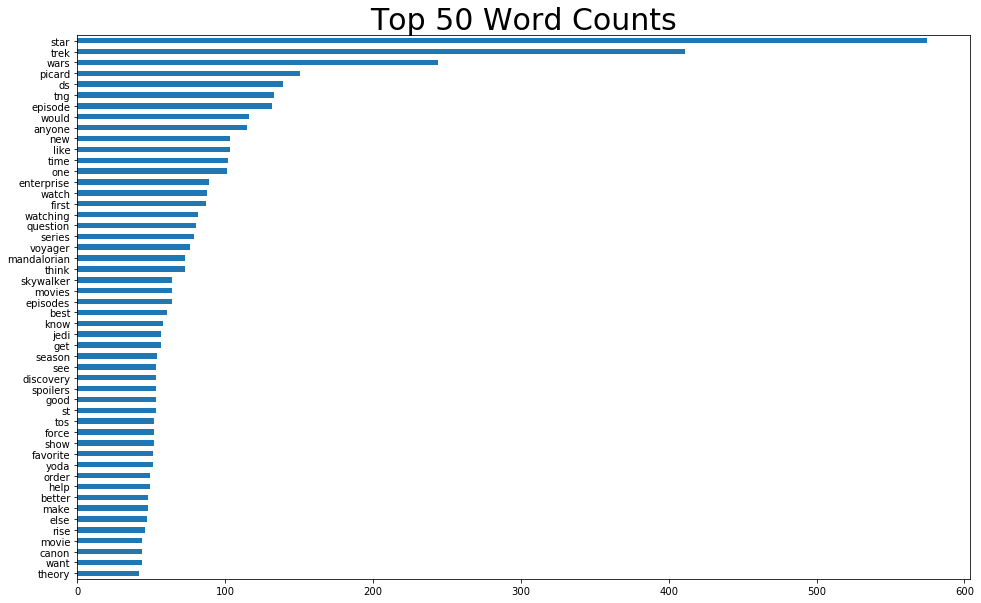

In [31]:
title_count.sum().sort_values().tail(50).plot(kind = 'barh', figsize = (16,10))
plt.title('Top 50 Word Counts',fontsize = 30);


There is a decent distribution of non-filler words in the corpus. This shows that the stopwords library used was sufficient. "Star", "Trek", and "wars" are highly abundunt throughout the corpus but will be kept in for modeling as they will most likely be present in the article titles that will be fed in by the client as well. 

# Continue to Modelling and Conclusions notebook